# Desafio 5

Neste desafio, vamos praticar sobre redução de dimensionalidade com PCA e seleção de variáveis com RFE. Utilizaremos o _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), contendo originalmente 89 variáveis de mais de 18 mil jogadores do _game_ FIFA 2019.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as st
from sklearn.decomposition import PCA

from loguru import logger

In [2]:
fifa = pd.read_csv("fifa.csv")

In [3]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

try:
    fifa.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    logger.warning(f"Columns already dropped")

## Inicia sua análise a partir daqui

In [4]:
fifa.head(5)

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


Após verificar como é a estrutura do dataset, é importante mapear quais os tipos de dados presentes,e se há ou não dados faltantes:

In [6]:
#PARA A QUESTÃO 1
description = pd.DataFrame({'coluna':fifa.columns,'Nan(%)':fifa.isna().sum(axis=0)/len(fifa),'Tipo de dado':fifa.dtypes})
description

,coluna,Nan(%),Tipo de dado
Age,Age,0.000000,int64
Overall,Overall,0.000000,int64
Potential,Potential,0.000000,int64
Crossing,Crossing,0.002636,float64
Finishing,Finishing,0.002636,float64
HeadingAccuracy,HeadingAccuracy,0.002636,float64
ShortPassing,ShortPassing,0.002636,float64
Volleys,Volleys,0.002636,float64
Dribbling,Dribbling,0.002636,float64
Curve,Curve,0.002636,float64


Como as colunas possuem dados faltantes que representam menos de 0.003%, essas linhas podem ser eliminadas

In [ ]:
fifa = fifa.dropna()

In [ ]:
X= fifa.values

O próximo passo é aplicar o PCA para redução da dimensionalidade. Inicialmente serão utilizadas todas as features:

In [7]:
pca = PCA(n_components = len(X[0]))
pca.fit(X)

PCA(n_components=37)

In [9]:
evr = pca.explained_variance_ratio_

In [10]:
evr

array([5.65280555e-01, 1.81025219e-01, 5.95283391e-02, 4.34269284e-02,
       2.63532326e-02, 1.20707695e-02, 1.03550495e-02, 8.52951131e-03,
       7.87862979e-03, 7.20416677e-03, 7.18180297e-03, 6.32893542e-03,
       5.19242286e-03, 4.90798293e-03, 4.74209042e-03, 4.62772008e-03,
       4.25173246e-03, 3.86288432e-03, 3.76588448e-03, 3.75092615e-03,
       3.47815213e-03, 3.26730709e-03, 3.03137944e-03, 2.97415845e-03,
       2.56797543e-03, 2.30353342e-03, 2.14815132e-03, 1.56135904e-03,
       1.55351696e-03, 1.08664227e-03, 1.06824189e-03, 1.05891525e-03,
       9.58143746e-04, 8.89209394e-04, 8.59732430e-04, 7.34611045e-04,
       1.94187517e-04])

## Questão 1

Qual fração da variância consegue ser explicada pelo primeiro componente principal de `fifa`? Responda como um único float (entre 0 e 1) arredondado para três casas decimais.

Conforme feito acima,o vetor evr contendo as variancias explicadas estão dispostas em ordem crescente.

In [11]:
#VARIÂNCIA EXPLICADA PELO PRIMEIRO PCA
print("Primeiro PCA possui a variância explicada de: ",round(evr[0],3))

Primeiro PCA possui a variância explicada de:  0.565


## Questão 2

Quantos componentes principais precisamos para explicar 95% da variância total? Responda como un único escalar inteiro.

Text(0, 0.5, 'Variãncia explicada cumulativa')

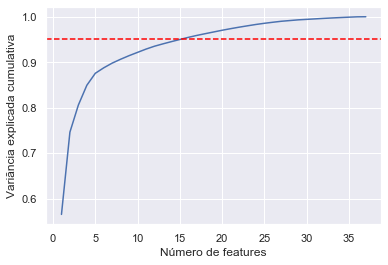

In [32]:
#ANÁLISE PARA A QUESTÃO 2
sns.set()
linha = sns.lineplot(range(1,len(evr)+1),np.cumsum(evr))
linha.axes.axhline(0.95,ls= '--',color = 'red')
plt.xlabel('Número de features')
plt.ylabel('Variãncia explicada cumulativa')

Uma forma mais automatizada de obter o valor ótimo pelo Elbow Method (Regra do cotovelo) é utilizar a variância explicada no lugar do número de componentes desejados:

In [12]:
pca = PCA(n_components = 0.95)
pca.fit(X)
evr = pca.explained_variance_ratio_
print("Número de features usadas: ",len(evr))

Número de features usadas:  15


## Questão 3

Qual são as coordenadas (primeiro e segundo componentes principais) do ponto `x` abaixo? O vetor abaixo já está centralizado. Cuidado para __não__ centralizar o vetor novamente (por exemplo, invocando `PCA.transform()` nele). Responda como uma tupla de float arredondados para três casas decimais.

In [13]:
x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814,
     -35.55091139, -37.29814417, -28.68671182, -30.90902583,
     -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566, -22.72696734, -25.50360703,
     2.16339005, -27.96657305, -33.46004736,  -5.08943224,
     -30.21994603,   3.68803348, -36.10997302, -30.86899058,
     -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351,
     48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
]

A ideia é saber qual a coordenada deste ponto depois da transformação em PCA. Sabe-se que pca.components_ é um vetor com os loadings do modelo, então a posição nova equivale a uma combinação linear, equivalente a um produto matricial. Sendo feito abaixo, foram obtidos os componentes para 15 features:

In [20]:
print(np.dot(pca.components_,x)[0:2])

[186.55588031  -6.59243177]


## Questão 4

Realize RFE com estimador de regressão linear para selecionar cinco variáveis, eliminando uma a uma. Quais são as variáveis selecionadas? Responda como uma lista de nomes de variáveis.

A ideia para essa resolução é aplicar a instância como o algorítmo de regressão linear, e aplicar o RFE para cinco variáveis:

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()
rfe = RFE(n_features_to_select = 5,estimator = estimator)
y = fifa['Overall'].values
fifa = fifa.drop(columns = ['Overall'])
X = fifa.values
rfe.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [22]:
RFE_exploration = pd.DataFrame({'coluna':fifa.columns,'Useful?':rfe.support_})
RFE_exploration = RFE_exploration.loc[RFE_exploration['Useful?'] == True]

In [23]:
useful_features = RFE_exploration['coluna'].tolist()

In [24]:
print("Variáveis a serem utilizadas: ",useful_features)

Variáveis a serem utilizadas:  ['Age', 'Potential', 'BallControl', 'Reactions', 'GKReflexes']
